# Filtro de partículas - 2018


Todo seu trabalho deve ficar no arquivo `projeto_pf.py`, que deve ficar num repositório Git privado (que pode estar no Github ou no Gitlab). Você deve adicionar os professores  em seu repositório (fabiomiranda@insper.edu.br  e andrewtnk@insper.edu.br )

A idéia é que você trabalhe somente na `projeto_pf.py` e use este *notebook* somente para instruções e para testar o que fez. Quando seu projeto estiver pronto o arquivo GIF gerado vai mostrar as partículas convergindo para a posição do robô.

Cada partícula vai ser representada por um objeto da classe `Particle`, do arquivo `pf.py`, que contém os atributos `x`,`y`,`theta` e `W`.  O atributo `W` é a probabilidade. 

Este projeto é individual. Lembre-se dos [princípios de honestidade de código](https://docs.google.com/document/d/e/2PACX-1vTiAczPm5Vxi7TXphB135LFH-Munp9X8ISHkeujrTvJtOmQaCC1iAUkoPdHgvkWhIkLsE0e1-T3ZGJ3/pub).




# Atividades


1. Crie uma função que gere n partículas aleatórias distribuídas uniformemente dentro de uma área minx, miny, maxx, maxy, n_particulas (passados como parâmetros). Veja a funcao `create_particles` no módulo `pf` para se inspirar. Sua função deve se chamar `cria_particulas` e ficar no arquivo `projeto_pf.py`.  
Esta função deve devolver o número de partículas solicitado

2. Crie uma função que aplica o deslocamento pelo qual o robô padrão [delta_x, delta_y, delta_theta] normal com um desvio padrão [std_x, std_y, std_theta] a todas as partículas.  Esta função deve se chamar `move_particulas` e está também no arquivo `projeto_pf.py`.

3. Descubra como calcular $P(D|H)$ analisando o Python Notebook. A função que traça os raios está no modulo inspercles

Programe a aplicação da equação que está na pág. 853 do livro do Norvig $$P(z_t | x_t) = \alpha \prod_{j}^M{e^{\frac{-(z_j - \hat{z_j})}{2\sigma^2}}}$$

Ou seja, para cada raio estimado $\hat{z_j}$ e leitura real $z_j$ calcule a probabilidade daquele raio  real ter acontecido se o robô estivesse na posição em que a partícula está

Faça o traçado dos raios e o cálculo da probabilidade na função `leituras_laser_evidencias`, que também está no arquivo `projeto_pf`

Note que o valor dos $P(H)$ calculados a cada iteração devem ir para o atributo `W` dos objetos da classe partículas. 

4 . Reamostre as partículas de forma proporcional à probabilidade na função `reamostrar`. Baseie-se no `notebook` chamado `como_sortear`, mas lembre-se de que você precisa incluir uma variação normal às partículas reproduzidas.  **Lembre-se também que depois de reamostrar as partículas precisam ter seu peso W tornado igual novamente**.



In [1]:
import projeto_pf # Seu trabalho fica em projeto_pf. Você não deveria precisar editar este notebook

import inspercles
import graphics_nb
import importlib
importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
import matplotlib.pyplot as plt
%matplotlib inline


## Diretório de trabalho

In [2]:
!pwd




/Users/mirwox/robot/src/robot18/projeto2


Criação das partículas: chamamos a função `projeto_pf.cria_particulas()` para fazer a criação inicial. Estamos armazenando na própria `projeto_pf`. 

In [3]:
projeto_pf.particulas = projeto_pf.cria_particulas()



    

## Mapa com posição inicial

Você **não** precisa se preocupar com as funções de desenho. 

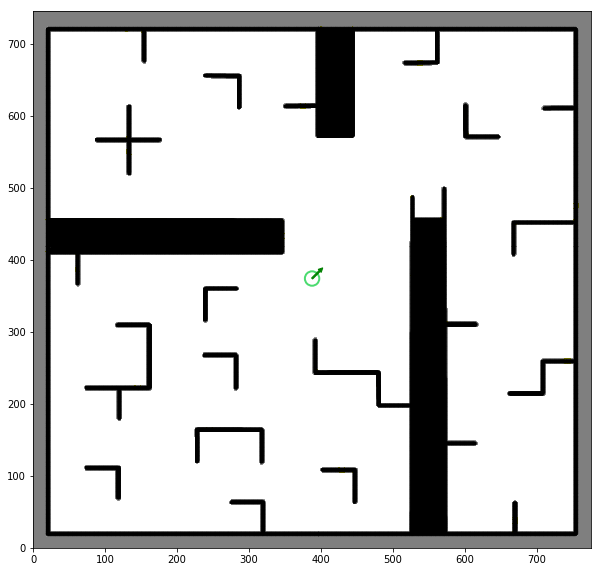

In [4]:
graphics_nb.draw_map(projeto_pf.robot)

# Simulação da imagem do laser

Para simular a leitura **real** do robo, use `inspercles.nb_lidar` passando o objeto robô. 

Você vai precisar fazer isso dentro da função `leituras_laser_evidencias`(que está em `projeto_pf.py`). Haverá uma leitura simulada para o robô e uma simulada para cada partícula

In [5]:
r = projeto_pf.robot
leituras = inspercles.nb_lidar(r, projeto_pf.angles)


O *array* leituras é um dicionário em que as chaves são os ângulos do laser relativos ao robô e o valor é a distância em *cm* em que um obstáculo foi observado naquela direção

In [6]:
leituras

{0.7853981633974483: 296.2777413171634,
 1.5707963267948966: 243.0,
 2.356194490192345: 54.44722215136416,
 3.141592653589793: 321.5,
 3.9269908169872414: 375.47370081005664,
 4.71238898038469: 358.0,
 5.497787143782138: 191.62593770155442,
 6.283185307179586: 135.5}

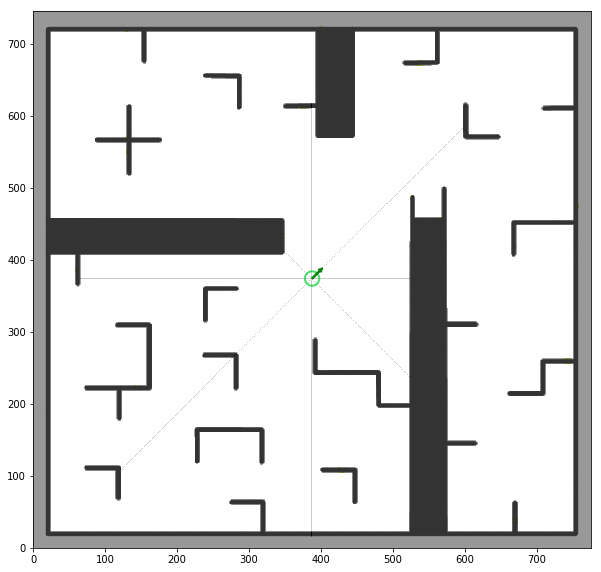

In [7]:

# Você não deve se preocupar com o código abaixo - é só para gerar uma imagem que será mostrada mais adiante
leituras, inspercles.lidar_map = inspercles.nb_simulate_lidar_fast(projeto_pf.robot.pose(), projeto_pf.angles, inspercles.np_image)
ax = inspercles.nb_draw_map(inspercles.lidar_map, robot=True, pose=projeto_pf.robot.pose())
ax.imshow(inspercles.color_image, alpha=0.8)

## Loop principal dos movimentos do robô

Há uma lista de deslocamentos para o robô chamada `movimentos` no arquivo `projeto_pf`. Vamos usá-la para simular o movimento no filtro de partículas




Atenção: quando for gerar os arquivos png da entrega por favor apague todos os arquivos do tipo anim*png antes de gerar a versão final

In [8]:
# No Windows: 
!del anim*png

/bin/sh: del: command not found


In [9]:
# No Linux ou Mac
! rm anim*png

In [10]:
## Atenção: Você não deveria precisar mexer no código abaixo


plt.ioff() # Desliga o modo interativo, para nao aparecerem muitas imagens no meio por causa da animação

frames = 1



for delta in projeto_pf.movimentos:
    
    projeto_pf.robot.move(delta)

    projeto_pf.move_particulas(projeto_pf.particulas, delta)
        
    # Simula a leitura do lidar para o robô - versão desenho
    leituras, inspercles.lidar_map = inspercles.nb_simulate_lidar_fast(projeto_pf.robot.pose(), projeto_pf.angles, inspercles.np_image)

    
    # Simula a leitura - versao codigo
    
    
    # Simula o lidar para as particulas
    
    for p in projeto_pf.particulas:
        leituras = inspercles.nb_lidar(p, projeto_pf.angles)
        
    # Atualiza probabilidade e posicoes
    projeto_pf.leituras_laser_evidencias(projeto_pf.robot, projeto_pf.particulas)
    
    # Reamostra as particulas
    projeto_pf.particulas = projeto_pf.reamostrar(projeto_pf.particulas)
    
    
    # Desenha as particulas
    ax = inspercles.nb_draw_map(inspercles.np_image, pose=projeto_pf.robot.pose(), robot=True, particles=projeto_pf.particulas)

    # Desenha o mapa do lidar como fundo
    ax.imshow(inspercles.lidar_map, alpha=0.5)
    
    plt.savefig("anim%04d.png"%frames, bounds="tight")
    
    frames+=1
    plt.close('all')


plt.ion()



### Gerando o arquivo da animação em GIF

Para gerar os gifs é preciso ter o pacote *imagemagick*, que pode ser obtido neste [site](https://www.imagemagick.org/script/index.php).
    
Agora vamos invocar na linha de comando o seguinte comando:
    convert -delay 10 -loop 1 anim*png animated.gif
    
Este comando criou um arquivo chamado *animated.gif*, que leremos abaixo:
    

In [11]:
!convert -delay 10 -loop 1 anim*png animated.gif

Infelizmente o Jupyter Notebook não parece exibir animações em `Gif` por default, mas você pode abrir o arquivo no diretório de trabalho e deverá  vê-lo.

<img src="animated.gif">

![](anim.gif)


Imagem
![]("./animated.gif")